In [1]:
!pip install fer
!pip install opencv-python

  if event.key is 'enter':



Saving WhatsApp Image 2025-04-11 at 16.25.32_c18eef66.jpg to WhatsApp Image 2025-04-11 at 16.25.32_c18eef66.jpg


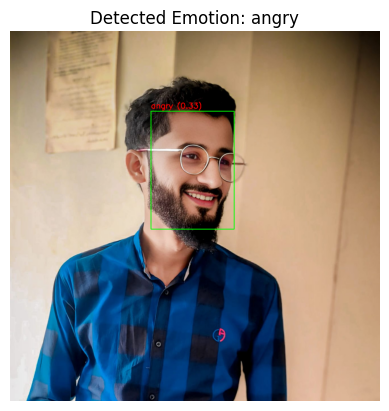

In [2]:
from fer import FER
import cv2
from google.colab import files
import matplotlib.pyplot as plt

# Upload an image
uploaded = files.upload()

# Load the uploaded image
for file_name in uploaded.keys():
    img = cv2.imread(file_name)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Initialize detector
    detector = FER(mtcnn=True)
    result = detector.detect_emotions(img_rgb)

    # Draw emotion boxes
    for face in result:
        (x, y, w, h) = face["box"]
        emotion, score = detector.top_emotion(img_rgb)
        cv2.rectangle(img_rgb, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(img_rgb, f'{emotion} ({score:.2f})', (x, y-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    # Display result
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(f"Detected Emotion: {emotion}")
    plt.show()
